# House Price Predicition project 

#### Data Description

There are 81 Variables given house property and the predicted variable is in the last Sales price of the house.


Some numerical variables in the dataset included are -

SalesPrice: This variable represents the sales price of the house

LotArea: This variable represents the size of a lot in square feet

OverallQual: This variable represents rates of the overall material and finish of the house

OverallCond: This variable represents rates of the overall conditions of the house

1stFirSF: This variable represents the first floor in square feet

2ndFirSF: This variable represents the second floor in square feet

BedroomAbvGr: This variable represents bedrooms above grade (does not include basement bedrooms)

YearBuilt: This variable represents the original construction date (this is not technically a numerical variable, but we will use it to produce another variable called Age )
 


Some categorical variables are –

MSZoning: This variable identifies the general zoning classification of the sale

LotShape: This variable represents the general shape of the property

Neighborhood: This variable represents physical locations within Ames city limits

CentralAir: This variable represents central air conditioning

SaleCondition: This variable represents condition of sale

MoSold: This variable represents month sold (MM)

YrSold: This variable represents year sold (YYYY)


#### Aim

To predict the sale prices of the houses and improve the log error i.e. the error due to the difference between the actual and the predicted home values.

# Step 1 - Load the dataset and read it

In [8]:
!pip install seaborn

In [9]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Read the data

def read_file(filepath):
    data = pd.read_csv(filepath)
    return data

In [11]:
train_data = read_file("data/housing_train.csv")
train_data.shape

(1460, 81)

In [12]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2 - Data Cleaning

In [13]:
# lets check the datatype
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
def unique_val(df):
    unique_vals_dict = {}

    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            unique_vals_dict[column] = unique_values

    return unique_vals_dict


In [15]:
def unique_val(df):
    unique_vals_dict = {}

    for column in df.columns:
        unique_values = df[column].unique()
        unique_vals_dict[column] = unique_values

    return unique_vals_dict

In [16]:
unique_val(train_data)

{'Id': array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64),
 'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
         91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
         74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
         81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
         77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
         92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
         67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
         87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
         38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
        114., 128., 149., 313., 168., 182., 138., 160., 15

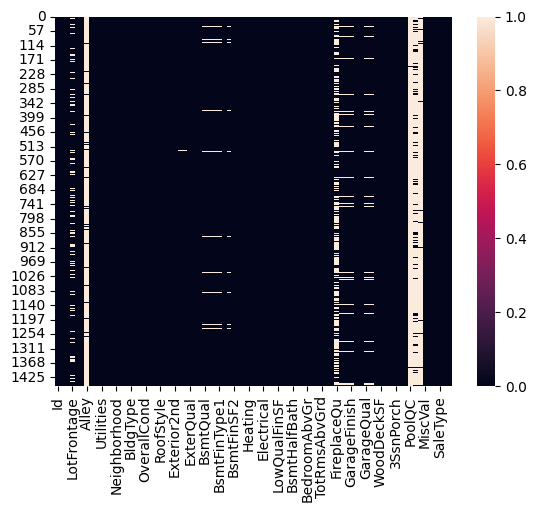

In [17]:
# lets a heatmap to check the same
sns.heatmap(train_data.isnull())
plt.show()

## we can see there are some nulls, lets clean these in data cleaning step

<AxesSubplot:>

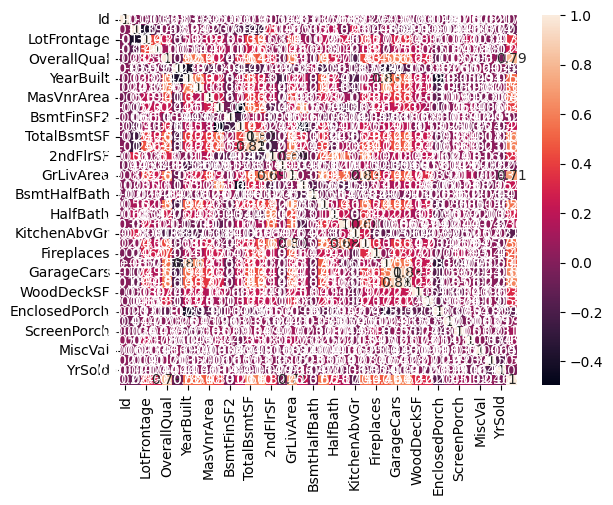

In [18]:
## lets also plot a correlation matrix

sns.heatmap(train_data.corr(), annot = True)


In [19]:
# the plot above is not good, lets create a correlation dataframe for better undertsanding

correlation_matrix = train_data.corr()

#Round the correlation values to a specific number of decimal places
correlation_matrix = correlation_matrix.round(2)

# Print the correlation dataframe
print(correlation_matrix)


                 Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id             1.00        0.01        -0.01    -0.03        -0.03   
MSSubClass     0.01        1.00        -0.39    -0.14         0.03   
LotFrontage   -0.01       -0.39         1.00     0.43         0.25   
LotArea       -0.03       -0.14         0.43     1.00         0.11   
OverallQual   -0.03        0.03         0.25     0.11         1.00   
OverallCond    0.01       -0.06        -0.06    -0.01        -0.09   
YearBuilt     -0.01        0.03         0.12     0.01         0.57   
YearRemodAdd  -0.02        0.04         0.09     0.01         0.55   
MasVnrArea    -0.05        0.02         0.19     0.10         0.41   
BsmtFinSF1    -0.01       -0.07         0.23     0.21         0.24   
BsmtFinSF2    -0.01       -0.07         0.05     0.11        -0.06   
BsmtUnfSF     -0.01       -0.14         0.13    -0.00         0.31   
TotalBsmtSF   -0.02       -0.24         0.39     0.26         0.54   
1stFlrSF       0.01 

# Step 3 - Exploratory Data Analysis (EDA)

In [20]:
## Lets check for any nulls

def check_nulls(df):
    null_counts = df.isnull().sum()
    columns_with_nulls = null_counts[null_counts > 0].index.tolist()
    return columns_with_nulls


In [21]:
check_nulls(train_data) 

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [22]:
def remove_nulls_cols(df, thershold):
    # lets put condition on our columns to be filtered 
    null_cols = df.isnull().mean() > thershold
    # consider the rest
    df = df.loc[:, ~null_cols]
    return df

In [23]:
train_data_new = remove_nulls_cols(train_data, 0.1)
train_data_new.shape

(1460, 75)

In [24]:
train_data_new.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
# now, for the rest of the null values, lets do data imputation 

def data_imput(df):
    for col in df.columns:
        if df[col].dtype == "float64" or df[col].dtype == 'int64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode().values[0])
        else:
            print("Column type not supported")
    
    return df

In [26]:
train_data = data_imput(train_data_new)
train_data.shape

c:\Users\siddh\anaconda3\envs\rstudio-_1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\siddh\anaconda3\envs\rstudio-_1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1460, 75)

In [27]:
check_nulls(train_data) 

[]

In [28]:
num_df = train_data.select_dtypes(include=np.number)
print(num_df.shape)

(1460, 37)


In [29]:
# Define a threshold for outlier detection (3 standard deviations from the mean)
outlier_threshold = 4.5

# Calculate the z-scores for the numerical columns
z_scores = (num_df - num_df.mean()) / num_df.std(ddof=0)

# Identify outlier rows in numerical columns
outlier_rows_num = z_scores.apply(lambda x: any(x > outlier_threshold), axis=1)


In [30]:
# Select the categorical columns in the dataset
cat_cols = train_data.select_dtypes(include=['object']).columns
cat_df = train_data[cat_cols]

# Identify outlier rows in categorical columns
outlier_rows_cat = cat_df.apply(lambda x: any(x == ""), axis=1)

# Combine outlier rows from both numerical and categorical columns
outlier_rows = outlier_rows_num | outlier_rows_cat


In [31]:
# Print the number of detected outliers for each column type
print("Number of outliers detected:", f"Total: {sum(outlier_rows)}")

Number of outliers detected: Total: 118


In [32]:
# Remove the outlier rows from the dataset
train_data_clean = train_data[~outlier_rows]
train_data_clean.shape

(1342, 75)

In [33]:
# Now, in EDA we saw the correlation plot too, lets remove the highly correlated variables, so that it wont result poor performance

# Assuming you have a DataFrame called 'train_data' containing your data
corr_matrix = train_data.corr()

# Convert correlation matrix to a long-form DataFrame
d2 = corr_matrix.stack().reset_index()
d2.columns = ['var1', 'var2', 'value']

# Filter out the variables to remove based on the condition
to_remove = d2[((d2['value'] > 0.75) | (d2['value'] < -0.75)) & (d2['var1'] != d2['var2'])]

print(to_remove)


              var1          var2     value
147    OverallQual     SalePrice  0.790982
209      YearBuilt   GarageYrBlt  0.780555
419    TotalBsmtSF      1stFlrSF  0.819530
455       1stFlrSF   TotalBsmtSF  0.819530
577      GrLivArea  TotRmsAbvGrd  0.825489
829   TotRmsAbvGrd     GrLivArea  0.825489
893    GarageYrBlt     YearBuilt  0.780555
951     GarageCars    GarageArea  0.882475
987     GarageArea    GarageCars  0.882475
1335     SalePrice   OverallQual  0.790982


In [34]:
# based on high correlation I have choosen following eight columns to drop

train_data_final = train_data_clean.drop(['Exterior1st','GarageArea','GrLivArea','Exterior2nd','TotRmsAbvGrd','GarageCars','GarageCond','GarageQual'], axis =1)
train_data_final.shape

(1342, 67)

In [35]:
train_data_final.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Step 4 - Data Preparation

In [36]:
train_data = train_data_final.drop('Id', axis = 1)
train_data.shape

(1342, 66)

In [37]:
# now lets perform train-test split

X = train_data.drop('SalePrice', axis = 1)
y = train_data['SalePrice']

X.shape, y.shape

((1342, 65), (1342,))

In [38]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include= np.object)
cars_num = X.select_dtypes(include = np.number)

c:\Users\siddh\anaconda3\envs\rstudio-_1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [39]:
cars_categorical.shape

(1342, 34)

In [40]:
cars_num.shape

(1342, 31)

In [41]:
# using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
encoding = OrdinalEncoder()

In [42]:
cat_cols = cars_categorical.columns.tolist()

In [43]:
encoding.fit(cars_categorical[cat_cols])
cat_en = encoding.transform(cars_categorical[cat_cols])
cat_en=pd.DataFrame(cat_en,columns=cat_cols)
cars_categorical.reset_index(inplace=True,drop=True)
cat_en.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,0.0,1.0,4.0,3.0,6.0,1.0,1.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,1.0,4.0,2.0,6.0,5.0,2.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0


In [44]:
cars_num.reset_index(inplace=True,drop=True)
cat_en.reset_index(inplace=True,drop=True)

final_train_data = pd.concat([cars_num,cat_en],axis=1)
final_train_data.shape

(1342, 65)

In [45]:
final_train_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0.0,1.0,4.0,3.0,6.0,1.0,1.0,2.0,8.0,4.0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,2.0,1.0,4.0,2.0,6.0,5.0,2.0,2.0,8.0,0.0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0.0,1.0,4.0,2.0,6.0,1.0,1.0,2.0,8.0,4.0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# since we already have a test data, lets do train-validation 
X_train, X_val, y_train, y_val = train_test_split(final_train_data, y, test_size = 0.3, random_state = 100)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((939, 65), (403, 65), (939,), (403,))

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 5 - Lets build our models

In [50]:
# lets start with importing our regression models

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Lets start with linear regression:

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [52]:
linear_model_pred = linear_model.predict(X_val)

In [53]:
lm_mae = mean_absolute_error(y_val, linear_model_pred)
lm_mse = sqrt(mean_squared_error(y_val, linear_model_pred))
lm_accuracy = r2_score(y_val, linear_model_pred)

In [54]:
print("Mean Absolute Error (MAE) : {} ".format(lm_mae))
print("Mean Squared Error (MSE) : {}".format(lm_mse))
print("R Squared Value (R2) : {}".format(lm_accuracy))

Mean Absolute Error (MAE) : 17562.227747964564 
Mean Squared Error (MSE) : 25055.038391779217
R Squared Value (R2) : 0.8692504008195261


#### Elastic Net:

In [55]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [56]:
elasticnet_model_pred = elastic_net_model.predict(X_val)

In [57]:
el_mae = mean_absolute_error(y_val, elasticnet_model_pred)
el_mse = sqrt(mean_squared_error(y_val, elasticnet_model_pred))
el_accuracy = r2_score(y_val, elasticnet_model_pred)

In [58]:
print("Mean Absolute Error (MAE) : {} ".format(el_mae))
print("Mean Squared Error (MSE) : {}".format(el_mse))
print("R Squared Value (R2) : {}".format(el_accuracy))

Mean Absolute Error (MAE) : 17397.118105871512 
Mean Squared Error (MSE) : 24918.9315198493
R Squared Value (R2) : 0.8706670885252387


#### Ridge Regression Model:

In [59]:
ridge_reg_model = Ridge(alpha=1, solver='cholesky')
ridge_reg_model.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [60]:
ridge_reg_pred = ridge_reg_model.predict(X_val)

In [61]:
rg_mae = mean_absolute_error(y_val, ridge_reg_pred)
rg_mse = sqrt(mean_squared_error(y_val, ridge_reg_pred))
rg_accuracy = r2_score(y_val, ridge_reg_pred)

In [62]:
print("Mean Absolute Error (MAE) : {} ".format(rg_mae))
print("Mean Squared Error (MSE) : {}".format(rg_mse))
print("R Squared Value (R2) : {}".format(rg_accuracy))

Mean Absolute Error (MAE) : 17550.29950389943 
Mean Squared Error (MSE) : 25039.564743907566
R Squared Value (R2) : 0.8694118492662164


#### Lasso Regression:

In [63]:
lasso_reg_model = Lasso(alpha=0.1)
lasso_reg_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [64]:
lasso_reg_pred = lasso_reg_model.predict(X_val)

In [65]:
ls_mae = mean_absolute_error(y_val, lasso_reg_pred)
ls_mse = sqrt(mean_squared_error(y_val, lasso_reg_pred))
ls_accuracy = r2_score(y_val, lasso_reg_pred)

In [66]:
print("Mean Absolute Error (MAE) : {} ".format(ls_mae))
print("Mean Squared Error (MSE) : {}".format(ls_mse))
print("R Squared Value (R2) : {}".format(ls_accuracy))

Mean Absolute Error (MAE) : 17563.745276452 
Mean Squared Error (MSE) : 25053.04974352839
R Squared Value (R2) : 0.869271155498788


#### XG Boost Regression Model:

In [67]:
!pip install xgboost
import xgboost 

In [68]:
xgb_reg_model = xgboost.XGBRegressor()
xgb_reg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
xgb_reg_pred = xgb_reg_model.predict(X_val)

In [70]:
xgb_mae = mean_absolute_error(y_val, xgb_reg_pred)
xgb_mse = sqrt(mean_squared_error(y_val, xgb_reg_pred))
xgb_accuracy = r2_score(y_val, xgb_reg_pred)

In [71]:
print("Mean Absolute Error (MAE) : {} ".format(xgb_mae))
print("Mean Squared Error (MSE) : {}".format(xgb_mse))
print("R Squared Value (R2) : {}".format(xgb_accuracy))

Mean Absolute Error (MAE) : 17989.43775201613 
Mean Squared Error (MSE) : 27678.713625389573
R Squared Value (R2) : 0.8404333873555481


#### Ada Boost Regression Model:

In [72]:
adaboost_reg_model = AdaBoostRegressor()
adaboost_reg_model.fit(X_train, y_train)

AdaBoostRegressor()

In [73]:
adaboost_reg_pred = adaboost_reg_model.predict(X_val)

In [74]:
ada_mae = mean_absolute_error(y_val, adaboost_reg_pred)
ada_mse = sqrt(mean_squared_error(y_val, adaboost_reg_pred))
ada_accuracy = r2_score(y_val, adaboost_reg_pred)

In [75]:
print("Mean Absolute Error (MAE) : {} ".format(ada_mae))
print("Mean Squared Error (MSE) : {}".format(ada_mse))
print("R Squared Value (R2) : {}".format(ada_accuracy))

Mean Absolute Error (MAE) : 21940.305335236633 
Mean Squared Error (MSE) : 31918.348940216383
R Squared Value (R2) : 0.7878069977261527


#### Gradient Boosting Regression Model:

In [76]:
gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [77]:
gb_reg_pred = gb_reg_model.predict(X_val)

In [78]:
gb_mae = mean_absolute_error(y_val, gb_reg_pred)
gb_mse = sqrt(mean_squared_error(y_val, gb_reg_pred))
gb_accuracy = r2_score(y_val, gb_reg_pred)

In [79]:
print("Mean Absolute Error (MAE) : {} ".format(gb_mae))
print("Mean Squared Error (MSE) : {}".format(gb_mse))
print("R Squared Value (R2) : {}".format(gb_accuracy))

Mean Absolute Error (MAE) : 16413.48742166379 
Mean Squared Error (MSE) : 25142.99202069172
R Squared Value (R2) : 0.8683308183969386


#### Decision Tree Regressor:

In [80]:
dec_tree_model = DecisionTreeRegressor(max_depth=5)
dec_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [81]:
dec_tree_pred = dec_tree_model.predict(X_val)

In [82]:
dec_mae = mean_absolute_error(y_val, dec_tree_pred)
dec_mse = sqrt(mean_squared_error(y_val, dec_tree_pred))
dec_accuracy = r2_score(y_val, dec_tree_pred)

In [83]:
print("Mean Absolute Error (MAE) : {} ".format(dec_mae))
print("Mean Squared Error (MSE) : {}".format(dec_mse))
print("R Squared Value (R2) : {}".format(dec_accuracy))

Mean Absolute Error (MAE) : 28279.646110910635 
Mean Squared Error (MSE) : 39407.252907486414
R Squared Value (R2) : 0.676553434986626


#### Random Forest Regression Model:

In [84]:
rf_forest_model = RandomForestRegressor(n_estimators= 500, max_depth=6)
rf_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [85]:
forest_reg_pred = rf_forest_model.predict(X_val)

In [86]:
rf_mae = mean_absolute_error(y_val, forest_reg_pred)
rf_mse = sqrt(mean_squared_error(y_val, forest_reg_pred))
rf_accuracy = r2_score(y_val, forest_reg_pred)

In [87]:
print("Mean Absolute Error (MAE) : {} ".format(rf_mae))
print("Mean Squared Error (MSE) : {}".format(rf_mse))
print("R Squared Value (R2) : {}".format(rf_accuracy))

Mean Absolute Error (MAE) : 20038.747932645987 
Mean Squared Error (MSE) : 29758.199077696205
R Squared Value (R2) : 0.8155564337845288


##### Cross Validation & Hyperparameter Optimization:

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [89]:
scores = cross_val_score(rf_forest_model, 
                         X_train, 
                         y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 5)

In [90]:
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

array([27761.67813275, 24934.25030974, 27371.69506922, 24742.9661913 ,
       27913.35384645])

In [91]:
param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]}
]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, 
                           param_grid, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=3)

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 400}

In [94]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=400)

In [95]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_val)

In [96]:
final_rf_mae = mean_absolute_error(y_val, final_pred)
final_rf_mse = sqrt(mean_squared_error(y_val, final_pred))
final_rf_accuracy = r2_score(y_val, final_pred)

In [97]:
print("Mean Absolute Error (MAE) : {} ".format(final_rf_mae))
print("Mean Squared Error (MSE) : {}".format(final_rf_mse))
print("R Squared Value (R2) : {}".format(final_rf_accuracy))

Mean Absolute Error (MAE) : 16537.456581885857 
Mean Squared Error (MSE) : 27242.34366785758
R Squared Value (R2) : 0.8454250353728637


In [130]:
## lets check the feature importance, using randomforest model

# Train a Random Forest regressor with the optimized hyperparameters
rf = RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=400)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe with feature names and importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances.head(15))


         Feature  Importance
2        LotArea    0.124244
4       LotShape    0.071101
10    Condition1    0.070727
11    Condition2    0.065950
46  KitchenAbvGr    0.061104
49    Fireplaces    0.047409
16     YearBuilt    0.043819
7      LotConfig    0.040446
21    MasVnrArea    0.039314
58   ScreenPorch    0.038133
12      BldgType    0.035061
1       MSZoning    0.033272
5    LandContour    0.032541
61        MoSold    0.032385
6      Utilities    0.025661


In [132]:
pip install streamlit

     ---------------------------------------- 8.9/8.9 MB 8.3 MB/s eta 0:00:00
     ------------------------------------- 422.0/422.0 kB 13.3 MB/s eta 0:00:00
     -------------------------------------- 188.5/188.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.8/4.8 MB 9.9 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 10.2 MB/s eta 0:00:00
     ------------------------------------- 239.4/239.4 kB 15.3 MB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB ? eta 0:00:00
     -------------------------------------- 471.5/471.5 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
     -------------------------------

In [133]:
import streamlit as st
# Select the important features based on their importance scores
selected_features = ['LotArea', 'LotShape', 'Condition1', 'Condition2', 'KitchenAbvGr', 'Fireplaces',
                     'YearBuilt', 'LotConfig', 'MasVnrArea', 'ScreenPorch', 'BldgType', 'MSZoning',
                     'LandContour', 'MoSold', 'Utilities']

# Filter the dataset based on the selected features
X_selected = train_data[selected_features]

# Train a Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_selected, y)

# Create the Streamlit app
st.title('House Price Prediction')

# Add input fields for the selected features
lot_area = st.slider('Lot Area', float(X['LotArea'].min()), float(X['LotArea'].max()), float(X['LotArea'].mean()))
lot_shape = st.selectbox('Lot Shape', X['LotShape'].unique())
condition1 = st.selectbox('Condition 1', X['Condition1'].unique())
condition2 = st.selectbox('Condition 2', X['Condition2'].unique())
kitchen_abv_gr = st.slider('Number of Kitchens', int(X['KitchenAbvGr'].min()), int(X['KitchenAbvGr'].max()), int(X['KitchenAbvGr'].mean()))
fireplaces = st.slider('Number of Fireplaces', int(X['Fireplaces'].min()), int(X['Fireplaces'].max()), int(X['Fireplaces'].mean()))
year_built = st.slider('Year Built', int(X['YearBuilt'].min()), int(X['YearBuilt'].max()), int(X['YearBuilt'].mean()))
lot_config = st.selectbox('Lot Configuration', X['LotConfig'].unique())
mas_vnr_area = st.slider('Masonry Veneer Area', float(X['MasVnrArea'].min()), float(X['MasVnrArea'].max()), float(X['MasVnrArea'].mean()))
screen_porch = st.slider('Screen Porch Area', float(X['ScreenPorch'].min()), float(X['ScreenPorch'].max()), float(X['ScreenPorch'].mean()))
bldg_type = st.selectbox('Building Type', X['BldgType'].unique())
ms_zoning = st.selectbox('MS Zoning', X['MSZoning'].unique())
land_contour = st.selectbox('Land Contour', X['LandContour'].unique())
mo_sold = st.slider('Month Sold', int(X['MoSold'].min()), int(X['MoSold'].max()), int(X['MoSold'].mean()))
utilities = st.selectbox('Utilities', X['Utilities'].unique())

# Create a dataframe with the user input
input_data = pd.DataFrame({'LotArea': [lot_area],
                           'LotShape': [lot_shape],
                           'Condition1': [condition1],
                           'Condition2': [condition2],
                           'KitchenAbvGr': [kitchen_abv_gr],
                           'Fireplaces': [fireplaces],
                           'YearBuilt': [year_built],
                           'LotConfig': [lot_config],
                           'MasVnrArea': [mas_vnr_area],
                           'ScreenPorch': [screen_porch],
                           'BldgType': [bldg_type],
                           'MSZoning': [ms_zoning],
                           'LandContour': [land_contour],
                           'MoSold': [mo_sold],
                           'Utilities': [utilities]})

# Make a prediction using the Random Forest model
prediction = rf.predict(input_data)

# Display the prediction
st.subheader('Prediction')
st.write(f"The predicted house price is: ${prediction[0]:,.2f}")


ValueError: could not convert string to float: 'Reg'

## Step 6 - Model comparision and analysis

In [99]:
# Create a dictionary with the model names and RMSE values
data_models = {
    'Model': ['linear_model', 'elastic_net_model', 'ridge_reg_model', 'lasso_reg_model', 'xgb_reg_model', 'adaboost_reg_model', 'gb_reg_model', 'dec_tree_model', 'rf_tree_model'],
    'MAE': [lm_mae, el_mae, rg_mae, ls_mae, xgb_mae, ada_mae, gb_mae, dec_mae, rf_mae],
    'MSE' : [lm_mse, el_mse, rg_mse, ls_mse, xgb_mse, ada_mse, gb_mse, dec_mse, rf_mse],
    'Accuracy' : [lm_accuracy, el_accuracy, rg_accuracy, ls_accuracy, xgb_accuracy, ada_accuracy, gb_accuracy, dec_accuracy, rf_accuracy]
}

# Create a dataframe from the dictionary
metrics_df = pd.DataFrame(data_models)

# Print the dataframe
print(metrics_df)


                Model           MAE           MSE  Accuracy
0        linear_model  17562.227748  25055.038392  0.869250
1   elastic_net_model  17397.118106  24918.931520  0.870667
2     ridge_reg_model  17550.299504  25039.564744  0.869412
3     lasso_reg_model  17563.745276  25053.049744  0.869271
4       xgb_reg_model  17989.437752  27678.713625  0.840433
5  adaboost_reg_model  21940.305335  31918.348940  0.787807
6        gb_reg_model  16413.487422  25142.992021  0.868331
7      dec_tree_model  28279.646111  39407.252907  0.676553
8       rf_tree_model  20038.747933  29758.199078  0.815556


From the above analysis, we can see that almost all the models are performing well, and resulting is a good accuracy score.

The elastic net model has the highest accuracy score of 87% percent.

But, accuracy is not the only measure, for a good model predcition, high acccuracy and low error is neceesary, hence after considering these 2 factors, we chose the "gb model - Gradient Boosting Model" as it was low error rate and good accuracy too.


In [100]:
# save the gb model

import joblib

# Save the GBM model
joblib.dump(gb_reg_model, 'gb_reg_model.pkl')

['gb_reg_model.pkl']

## Step 7 - Lets, perform similar analysis on our test dataset

In [101]:
test_data = read_file("data/housing_test.csv")
test_data.shape

(1459, 80)

In [102]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [103]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [104]:
# lets perform the same cleaning steps on the test data too

check_nulls(test_data) 


['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [105]:
test_data = remove_nulls_cols(test_data, 0.1)
test_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [106]:
test_data_new = data_imput(test_data)
test_data_new.shape

(1459, 74)

In [107]:
## check and remove outliers

num_df = test_data.select_dtypes(include=np.number)
print(num_df.shape)

(1459, 36)


In [108]:
# Define a threshold for outlier detection (3 standard deviations from the mean)
outlier_threshold = 4.5

# Calculate the z-scores for the numerical columns
z_scores = (num_df - num_df.mean()) / num_df.std(ddof=0)

# Identify outlier rows in numerical columns
outlier_rows_num = z_scores.apply(lambda x: any(x > outlier_threshold), axis=1)

In [109]:
# Select the categorical columns in the dataset
cat_cols = test_data.select_dtypes(include=['object']).columns
cat_df = test_data[cat_cols]

# Identify outlier rows in categorical columns
outlier_rows_cat = cat_df.apply(lambda x: any(x == ""), axis=1)

# Combine outlier rows from both numerical and categorical columns
outlier_rows = outlier_rows_num | outlier_rows_cat


In [110]:
# Print the number of detected outliers for each column type
print("Number of outliers detected:", f"Total: {sum(outlier_rows)}")

Number of outliers detected: Total: 159


In [111]:
# Remove the outlier rows from the dataset
test_data_clean = test_data[~outlier_rows]
test_data_clean.shape

(1300, 74)

In [112]:
# based on high correlation I have choosen following eight columns to drop =  this are similar to the ones as train data

test_data_final = test_data_clean.drop(['Exterior1st','GarageArea','GrLivArea','Exterior2nd','TotRmsAbvGrd','GarageCars','GarageCond','GarageQual', 'Id'], axis =1)
test_data_final.shape

(1300, 65)

In [113]:
## dont forget the encoding part 

# subset all categorical variables
cars_categorical = test_data_final.select_dtypes(include= np.object)
cars_num = test_data_final.select_dtypes(include = np.number)


c:\Users\siddh\anaconda3\envs\rstudio-_1\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [114]:
cars_categorical.shape

(1300, 34)

In [115]:
cars_num.shape

(1300, 31)

In [116]:
cat_cols = cars_categorical.columns.tolist()
encoding.fit(cars_categorical[cat_cols])
cat_en = encoding.transform(cars_categorical[cat_cols])
cat_en=pd.DataFrame(cat_en,columns=cat_cols)
cars_categorical.reset_index(inplace=True,drop=True)
cat_en.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,2.0,...,4.0,1.0,3.0,3.0,5.0,1.0,2.0,2.0,8.0,4.0
1,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,2.0,1.0,3.0,3.0,5.0,1.0,0.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,0.0,1.0,3.0,2.0,5.0,1.0,0.0,2.0,8.0,4.0
3,3.0,1.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,2.0,...,0.0,1.0,3.0,2.0,5.0,1.0,1.0,2.0,8.0,4.0
4,3.0,1.0,0.0,3.0,0.0,0.0,0.0,8.0,2.0,2.0,...,2.0,1.0,3.0,3.0,5.0,1.0,0.0,2.0,8.0,4.0


In [117]:
cars_num.reset_index(inplace=True,drop=True)
cat_en.reset_index(inplace=True,drop=True)

In [118]:
final_test_data = pd.concat([cars_num,cat_en],axis=1)
final_test_data.shape

(1300, 65)

In [119]:
## now, based on the above analysis, we will be choosing gb model to make price predictions on the test data

# Load the trained GBM model
gbm_model = joblib.load('gb_reg_model.pkl')

In [120]:
# lets make predcitions on the model first
# Perform the prediction
test_prediction_final_model = gbm_model.predict(final_test_data)

c:\Users\siddh\anaconda3\envs\rstudio-_1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [121]:
# Create a DataFrame with the predictions
results_df = pd.DataFrame(test_prediction_final_model, columns=['Prediction'])

In [122]:
results_df.head()

,Prediction
0,418876.581625
1,495988.728670
2,512821.337886
3,444047.274409
4,467908.723584


In [123]:
# Save the results to a CSV file
results_df.to_csv('housing_test_results.csv', index=False)